# Wine Quality Testing predictions

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
    - 3.1 [Data Visualization](#section3.1)
    - 3.2 [Data Visualization- Target Variable](#section3.2)
    - 3.3 [Data Transform](#section3.3)
4. [ML Modeling](#section4)
    - 4.1 [Preparing X & Y](#section4.1)
    - 4.2 [Define Models](#section4.2)
    - 4.3 [Model Prediction](#section4.3)
5. [Model Evaluation](#section5)
    - 5.1 [Logistic Regression](#section5.1)
    - 5.2 [Decision Tree](#section5.2)
    - 5.3 [Grid Search CV](#section5.3)
    - 5.4 [Random Forest](#section5.4)
    - 5.5 [Randomized Search CV](#section5.5)
    - 5.6 [Evaluation Dataset](#section5.6)

In [248]:
# Import required libraries

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

### 1. Problem Statement

The Goal here is to **Predict the quality of Wine** with respect to the Attributes based on physicochemical tests

### 2. Data Loading and Description
<p align="center"><img src="https://miro.medium.com/max/2968/1*dFSpzDQJK50ur8ilFN59mQ.png"></p>

- The dataset is related to white variant of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


- Source of Dataset --> https://archive.ics.uci.edu/ml/datasets/wine+quality

-  Input variables (based on physicochemical tests):
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol 
   - 12 - quality (score between 0 and 10)

### **Importing Dataset**

In [249]:
data_ww = pd.read_csv('winequality-white.csv', delimiter=';')

In [250]:
data_ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [251]:
data_ww.shape

(4898, 12)

In [252]:
data_ww.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- Number of columns - 12
- Total rowsa - 4898
- No Null values

In [253]:
data_ww.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- Most of the columns are almost Normally distributed.

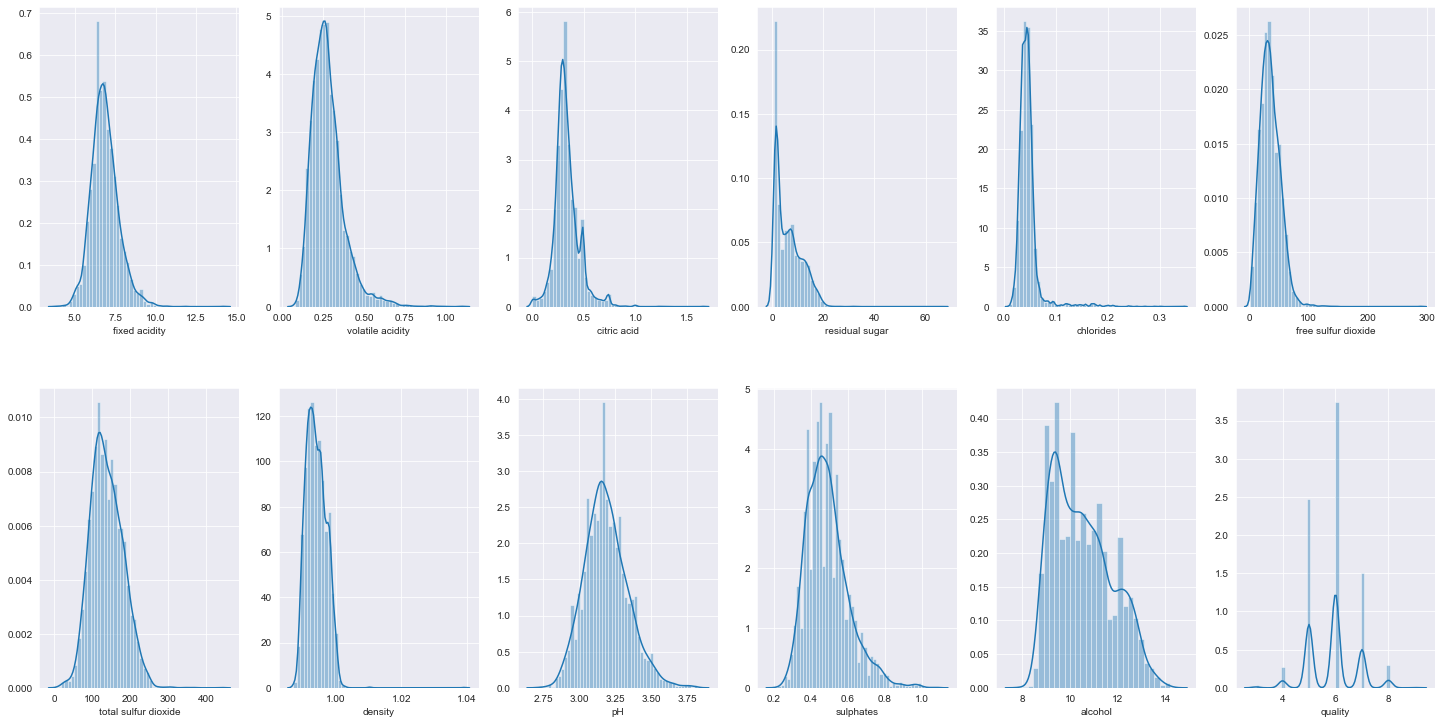

In [254]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data_ww.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

- Distribution Plot shows :-
    - 1 - fixed acidity - Normally distributed
    - 2 - volatile acidity - Slightly Right Skewed.
    - 3 - citric acid - Slightly Right Skewed.
    - 4 - residual sugar - Slightly Right Skewed, with possible outliers
    - 5 - chlorides - Slightly Right Skewed, with possible outliers
    - 6 - free sulfur dioxide - Slightly Right Skewed, with possible outliers
    - 7 - total sulfur dioxide - Normally distributed.
    - 8 - Density - Slightly Right Skewed, with possible outliers
    - 9 - pH - Normally distributed.
    - 10 - sulphates -  Normalyy distibuted.
    - 11 - alcohol - Normally distributed 
    - 12 - **quality - data type is int, but the column is Categorical.**
     

## 3. Pre-Processing

### 3.1 Data Visualization

In [255]:
data_ww.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

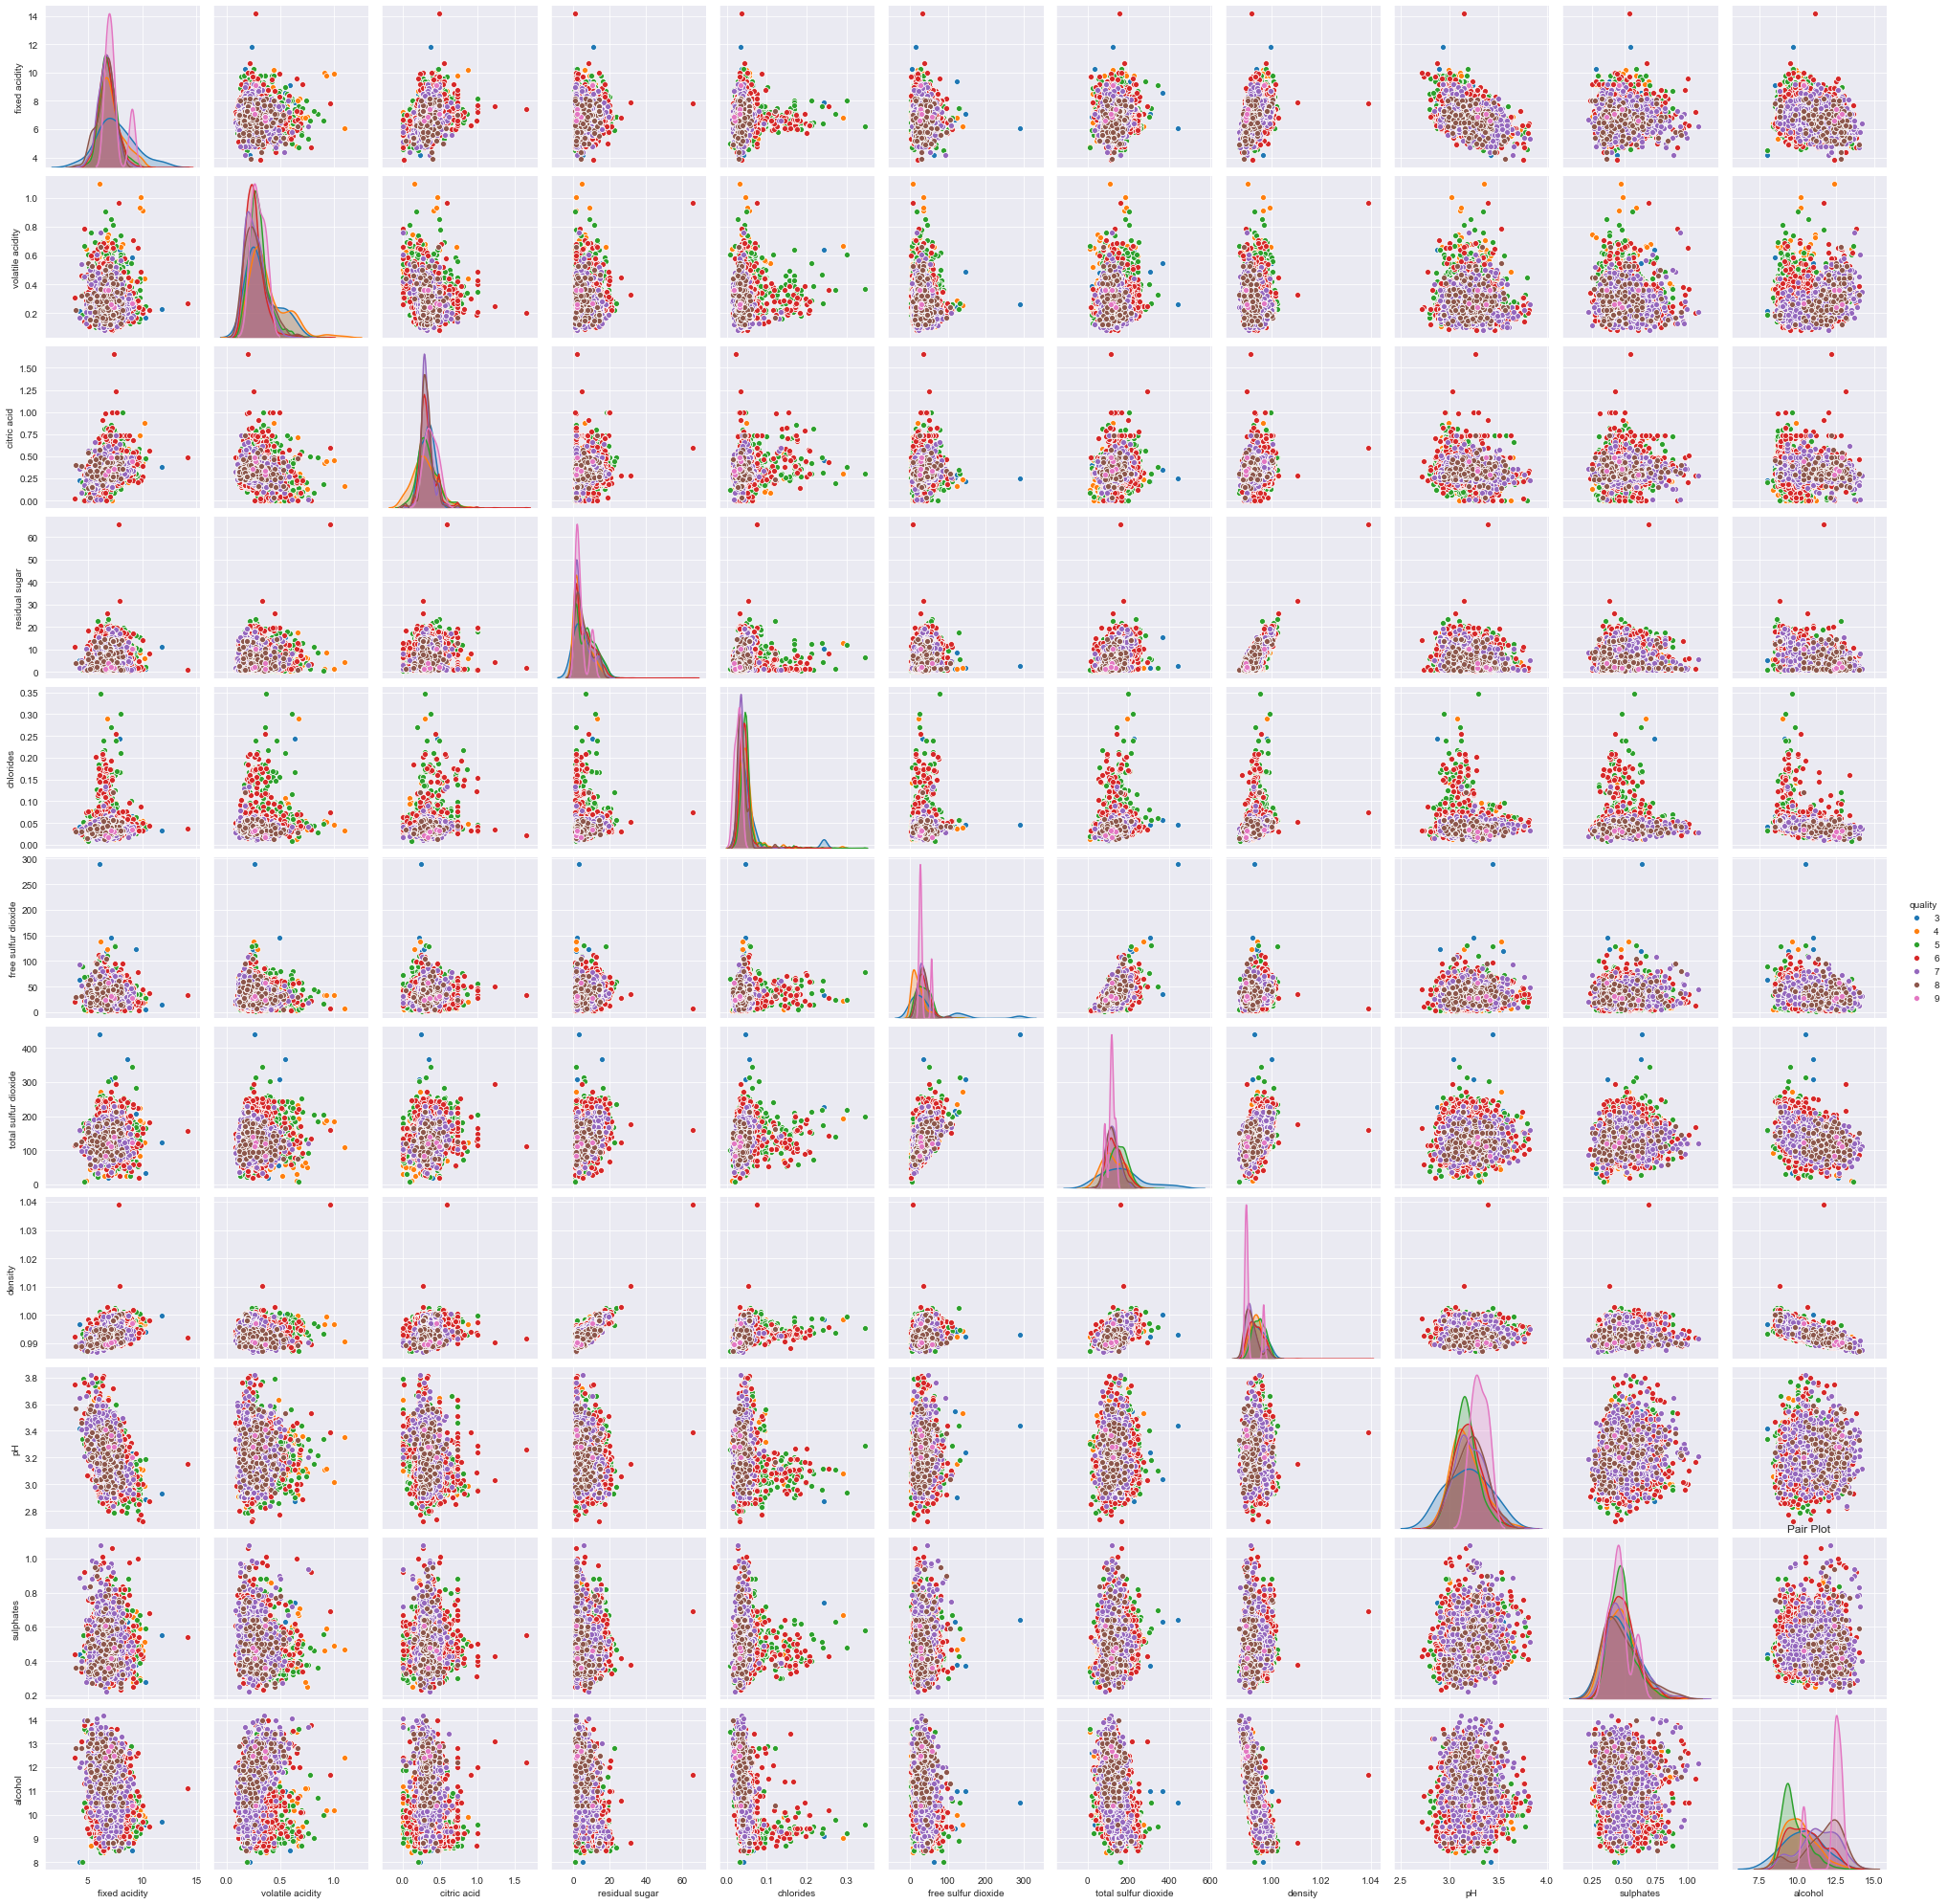

In [256]:
sns.pairplot(data_ww, vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],hue="quality", dropna=True)
plt.title('Pair Plot')
plt.tick_params(labelsize=12)

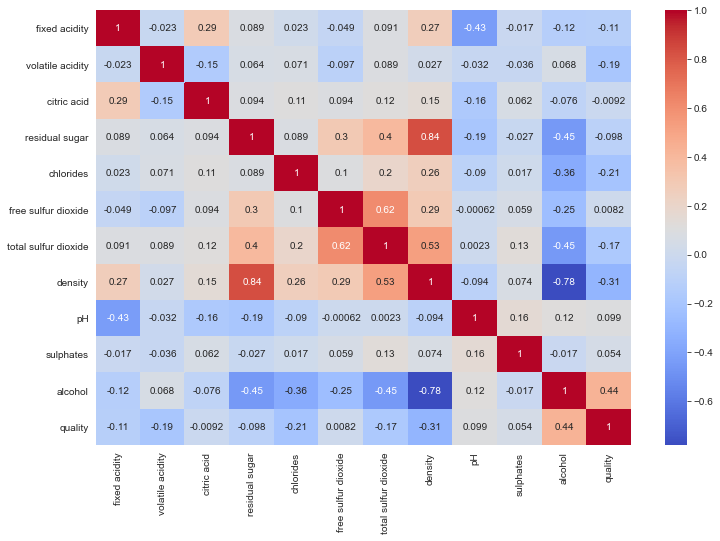

In [257]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_ww.corr(), annot=True, cmap='coolwarm')

- **Alcohol** is the main content for **better wine.**
- More alcohol also reduces the density.
- Volatile Acidity has a Negative impact on the quality of Wine

### 3.2 Data Visualization- Target Variable

In [258]:
data_ww['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [259]:
data_ww['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

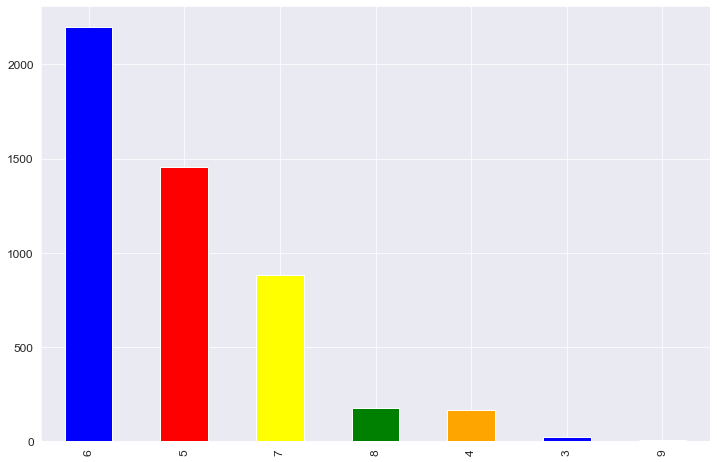

In [260]:
data_ww['quality'].value_counts().sort_values(ascending=False).plot.bar(figsize=(12,8), color=['blue','red','yellow','green','orange'])
plt.tick_params(labelsize=12)

### 3.3 Data transform

- We will Transform quality column as below:-
    - Value 3,4 --> Bad
    - Value 5,6 --> Good
    - Value 7,8,9 --> Excellent

In [261]:
data_ww['quality'] = data_ww['quality'].map({3 : 'bad', 4 :'bad', 5: 'good',
                                      6: 'good', 7: 'Excellent', 8: 'Excellent', 9: 'Excellent'})

In [262]:
data_ww['quality'].value_counts()

good         3655
Excellent    1060
bad           183
Name: quality, dtype: int64

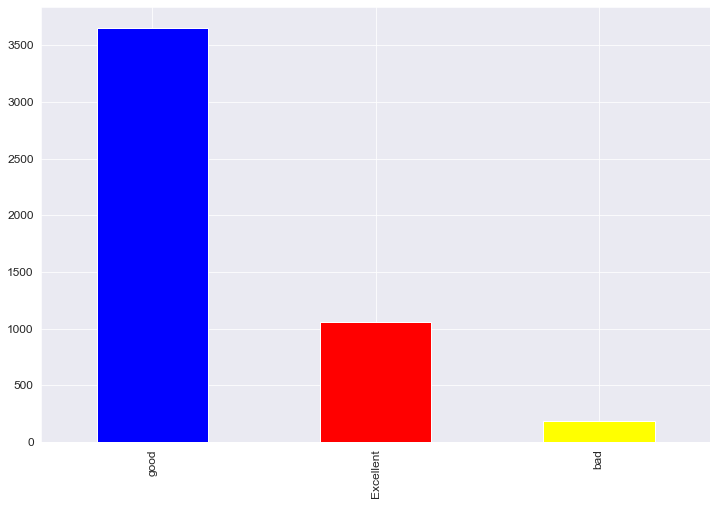

In [263]:
data_ww['quality'].value_counts().sort_values(ascending=False).plot.bar(figsize=(12,8), color=['blue','red','yellow','green','orange'])
plt.tick_params(labelsize=12)

## 4. ML Modeling

### 4.1 Preparing X & y

In [264]:
X = data_ww.drop('quality', axis=1)
y = data_ww['quality']

In [265]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [266]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: quality, dtype: object

In [267]:
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


### Scaling Data

In [268]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X= pd.DataFrame(X)

In [269]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


### Label Encoding

In [270]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y=label.fit_transform(data_ww['quality'])
y=pd.Series(y)

In [271]:
y.head()

0    2
1    2
2    2
3    2
4    2
dtype: int32

In [272]:
y.value_counts()

2    3655
0    1060
1     183
dtype: int64

## 4.2 Define Models

### Model Training

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [274]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
print('Train dataset shape: {} {}'.format(X_train.shape, y_train.shape))
print('Test dataset shape: {} {}'.format(X_test.shape, y_test.shape))

Train dataset shape: (3673, 11) (3673,)
Test dataset shape: (1225, 11) (1225,)


### Logistic Regression Model

In [275]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train,y_train)

LogisticRegression()

### Decision Tree Model

In [276]:
DT1 = tree.DecisionTreeClassifier(random_state = 0)
DT1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### GridSearch CV

In [277]:
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,50),'max_features': ['sqrt', 'log2', None] }]
grid_search_dt = GridSearchCV(DT1,tree_para, cv=5, refit='AUC')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 50),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

### Random Forest Model

In [278]:
RF_Classifier = RandomForestClassifier(random_state = 0)
RF_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Randomised Search 

In [279]:
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": range(2,12),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
random_search_RF = RandomizedSearchCV(RF_Classifier, param_distributions = param_dist,
                                   n_iter = 50,
                                   n_jobs = -1)
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 12),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEBBC00370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEBBC04AC0>,
                                        'n_estimators': [100, 400, 700, 200]})

### 4.3 Model Prediction

In [280]:
y_train_pred_LG = Log_reg.predict(X_train)
y_train_pred_DT1 = DT1.predict(X_train)
y_train_pred_GCV = grid_search_dt.predict(X_train)
y_train_pred_RF = RF_Classifier.predict(X_train)
y_train_pred_RSCV = random_search_RF.predict(X_train)

y_test_pred_LG = Log_reg.predict(X_test)
y_test_pred_DT1 = DT1.predict(X_test)
y_test_pred_GCV = grid_search_dt.predict(X_test)
y_test_pred_RF = RF_Classifier.predict(X_test)
y_test_pred_RSCV = random_search_RF.predict(X_test)

## 5 Model Evaluation

In [281]:
models = []
train_accuracy_scores = []
accuracy_scores = []
micro_precision_scores = []
micro_recall_scores = []
micro_f1_scores = []
macro_precision_scores = []
macro_recall_scores = []
macro_f1_scores = []
weighted_precision_scores = []
weighted_recall_scores = []
weighted_f1_scores = []

In [282]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


def model_evaluation(y_actual, y_preds, y_actual_train, y_preds_train, model_name):
    models.append(model_name)
    print('Accuracy  Train: ', accuracy_score(y_actual_train, y_preds_train))
    train_accuracy_scores.append(accuracy_score(y_actual_train, y_preds_train))
    print('Accuracy  Test: ', accuracy_score(y_actual, y_preds))
    accuracy_scores.append(accuracy_score(y_actual, y_preds))
    
    print('Micro Precision : ', precision_score(y_actual, y_preds, average='micro'))
    micro_precision_scores.append(precision_score(y_actual, y_preds,average='micro'))
    print('Micro Recall    : ', recall_score(y_actual, y_preds,average='micro'))
    micro_recall_scores.append(recall_score(y_actual, y_preds,average='micro'))
    print('Micro f1 score : ', f1_score(y_actual, y_preds,average='micro'))
    micro_f1_scores.append(f1_score(y_actual, y_preds,average='micro'))
    
    print('Macro Precision : ', precision_score(y_actual, y_preds, average='macro'))
    macro_precision_scores.append(precision_score(y_actual, y_preds,average='macro'))
    print('Macro Recall    : ', recall_score(y_actual, y_preds,average='macro'))
    macro_recall_scores.append(recall_score(y_actual, y_preds,average='macro'))
    print('Macro f1 score : ', f1_score(y_actual, y_preds,average='macro'))
    macro_f1_scores.append(f1_score(y_actual, y_preds,average='macro'))
    
    print('Weighted Precision : ', precision_score(y_actual, y_preds, average='weighted'))
    weighted_precision_scores.append(precision_score(y_actual, y_preds,average='weighted'))
    print('Weighted Recall    : ', recall_score(y_actual, y_preds,average='weighted'))
    weighted_recall_scores.append(recall_score(y_actual, y_preds,average='weighted'))
    print('Weighted f1 score : ', f1_score(y_actual, y_preds,average='weighted'))
    weighted_f1_scores.append(f1_score(y_actual, y_preds,average='weighted'))
    
def display_confusion_matrix(y_actual, y_preds):
    Confusion_Matrix = pd.DataFrame(confusion_matrix(y_actual, y_preds))
    Confusion_Matrix.index = ['Actual Excellent', 'Actual Bad', 'Actual Good']
    Confusion_Matrix.columns = ['Predicted Excellent', 'Predicted Bad', 'Predicted Good']
    print('Confusion Matrix')
    print(Confusion_Matrix)

### 5.1 Logistic Regression Evaluation

In [283]:
print('Logistic Regression:')
model_evaluation(y_test, y_test_pred_LG, y_train, y_train_pred_LG, 'Logistic Regression')
display_confusion_matrix(y_test, y_test_pred_LG)

Logistic Regression:
Accuracy  Train:  0.7658589708684999
Accuracy  Test:  0.76
Micro Precision :  0.76
Micro Recall    :  0.76
Micro f1 score :  0.76
Macro Precision :  0.45290820290820294
Macro Recall    :  0.40495742092457415
Macro f1 score :  0.40922588320895154
Weighted Precision :  0.7116926610804162
Weighted Recall    :  0.76
Weighted f1 score :  0.7190080600837131
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                   76              0             198
Actual Bad                          0              0              39
Actual Good                        56              1             855


### 5.2 Decision Tree Evaluation

In [284]:
print('Decision Tree:')
model_evaluation(y_test, y_test_pred_DT1, y_train, y_train_pred_DT1, 'Decision Tree')
display_confusion_matrix(y_test, y_test_pred_DT1)

Decision Tree:
Accuracy  Train:  1.0
Accuracy  Test:  0.7951020408163265
Micro Precision :  0.7951020408163265
Micro Recall    :  0.7951020408163265
Micro f1 score :  0.7951020408163266
Macro Precision :  0.5864528467808637
Macro Recall    :  0.5794121920466523
Macro f1 score :  0.5825201825189129
Weighted Precision :  0.7938107608732689
Weighted Recall    :  0.7951020408163265
Weighted f1 score :  0.7944025340766601
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  176              1              97
Actual Bad                          5              9              25
Actual Good                        99             24             789


### 5.3 GridSearch CV Evaluation

In [285]:
print('Grid Search CV:')
model_evaluation(y_test, y_test_pred_GCV, y_train, y_train_pred_GCV, 'Grid Search CV')
display_confusion_matrix(y_test, y_test_pred_GCV)

Grid Search CV:
Accuracy  Train:  0.9997277429893819
Accuracy  Test:  0.8016326530612244
Micro Precision :  0.8016326530612244
Micro Recall    :  0.8016326530612244
Micro f1 score :  0.8016326530612244
Macro Precision :  0.6058816881397527
Macro Recall    :  0.5918908081076734
Macro f1 score :  0.5985352408773399
Weighted Precision :  0.7976362946224697
Weighted Recall    :  0.8016326530612244
Weighted f1 score :  0.7994457546403251
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  168              1             105
Actual Bad                          6             11              22
Actual Good                        85             24             803


### 5.4 Random Forest Evaluation

In [286]:
print('Random Forest :')
model_evaluation(y_test, y_test_pred_RF, y_train, y_train_pred_RF, 'Random Forest')
display_confusion_matrix(y_test, y_test_pred_RF)

Random Forest :
Accuracy  Train:  1.0
Accuracy  Test:  0.8489795918367347
Micro Precision :  0.8489795918367347
Micro Recall    :  0.8489795918367347
Micro f1 score :  0.8489795918367347
Macro Precision :  0.7786572167541239
Macro Recall    :  0.5524148664755657
Macro f1 score :  0.5903162647467836
Weighted Precision :  0.8411640383832497
Weighted Recall    :  0.8489795918367347
Weighted f1 score :  0.8328775904051913
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  164              0             110
Actual Bad                          0              4              35
Actual Good                        38              2             872


### 5.5 Randomised Search CV Evaluation

In [287]:
print('Randomised Search CV :')
model_evaluation(y_test, y_test_pred_RSCV, y_train, y_train_pred_RSCV, 'Randomised Seach CV')
display_confusion_matrix(y_test, y_test_pred_RSCV)

Randomised Search CV :
Accuracy  Train:  0.9278518921862238
Accuracy  Test:  0.8155102040816327
Micro Precision :  0.8155102040816327
Micro Recall    :  0.8155102040816327
Micro f1 score :  0.8155102040816327
Macro Precision :  0.5257633587786259
Macro Recall    :  0.4774699065181201
Macro f1 score :  0.49045351473922905
Weighted Precision :  0.7836641221374046
Weighted Recall    :  0.8155102040816327
Weighted f1 score :  0.7898673330556713
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  132              0             142
Actual Bad                          0              0              39
Actual Good                        44              1             867


### 5.6 Evaluation Dataset

In [288]:
evaluation_dataset = {
    'Model' : models,
    'Train Accuracy' : train_accuracy_scores,
    'Accuracy' : accuracy_scores,
    'Micro Precision' : micro_precision_scores,
    'Micro Recall' : micro_recall_scores,
    'Micro F1 score' : micro_f1_scores,
    'Macro Precision' : macro_precision_scores,
    'Macro Recall' : macro_recall_scores,
    'Macro F1 score' : macro_f1_scores,
    'Weighted Precision' : weighted_precision_scores,
    'Weighted Recall' : weighted_recall_scores,
    'Weighted F1 score' : weighted_f1_scores
}

evaluation_df = pd.DataFrame(evaluation_dataset) 

evaluation_df

,Model,Train Accuracy,Accuracy,Micro Precision,Micro Recall,Micro F1 score,Macro Precision,Macro Recall,Macro F1 score,Weighted Precision,Weighted Recall,Weighted F1 score
0,Logistic Regression,0.765859,0.760000,0.760000,0.760000,0.760000,0.452908,0.404957,0.409226,0.711693,0.760000,0.719008
1,Decision Tree,1.000000,0.795102,0.795102,0.795102,0.795102,0.586453,0.579412,0.582520,0.793811,0.795102,0.794403
2,Grid Search CV,0.999728,0.801633,0.801633,0.801633,0.801633,0.605882,0.591891,0.598535,0.797636,0.801633,0.799446
3,Random Forest,1.000000,0.848980,0.848980,0.848980,0.848980,0.778657,0.552415,0.590316,0.841164,0.848980,0.832878
4,Randomised Seach CV,0.927852,0.815510,0.815510,0.815510,0.815510,0.525763,0.477470,0.490454,0.783664,0.815510,0.789867


- From above Evaluation we can see that the **best test accuracy** is given by **Random forest Model with 0.85% accuracy.**


- But our **Decision Tree Model & Random Forest Model are Overfitted** as they have a **train data accuracy of 100%.**


- Hence **Randomised Search CV Model is best with accuracy of 81.55%.**

## 6.0 Modeling 2.0

In [289]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X,y,test_size=0.20,random_state=1)
print('Train dataset shape: {} {}'.format(X_train_2.shape, y_train_2.shape))
print('Test dataset shape: {} {}'.format(X_test_2.shape, y_test_2.shape))

Train dataset shape: (3918, 11) (3918,)
Test dataset shape: (980, 11) (980,)


### 6.1 Logistic Regression 2

In [290]:
Log_reg_2 = LogisticRegression()
Log_reg_2.fit(X_train_2,y_train_2)

LogisticRegression()

### 6.2 Decision Tree

In [291]:
DT2 = tree.DecisionTreeClassifier(max_depth=15, random_state = 44)
DT2.fit(X_train_2,y_train_2)

DecisionTreeClassifier(max_depth=15, random_state=44)

### 6.3 Grid Search CV

In [292]:
tree_para2 = [{'criterion':['gini','entropy'],'max_depth': range(2,60),'max_features': ['sqrt', 'log2', None] }]
grid_search_dt2 = GridSearchCV(DT2,tree_para2, cv=10)
grid_search_dt2.fit(X_train_2,y_train_2)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=44),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

### 6.4 Random Forest

In [314]:
RF_Classifier_2 = RandomForestClassifier(random_state = 1, max_depth = 12)
RF_Classifier_2.fit(X_train_2,y_train_2)

RandomForestClassifier(max_depth=12, random_state=1)

### 6.5 Randomized Search CV

In [316]:
param_dist2 = {"max_depth": range(2,12),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100,500, 400, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
random_search_RF2 = RandomizedSearchCV(RF_Classifier_2, param_distributions = param_dist2,
                                   n_iter = 50,
                                   n_jobs = -1)
random_search_RF2.fit(X_train_2,y_train_2)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=12,
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 12),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEBBBF3D90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEBBFE7CD0>,
                                        'n_estimators': [100, 500, 400, 200]})

### 6.6 Model Prediction 2.0

In [317]:
y_train_pred_LG2 = Log_reg_2.predict(X_train_2)
y_train_pred_DT2 = DT2.predict(X_train_2)
y_train_pred_GCV2 = grid_search_dt2.predict(X_train_2)
y_train_pred_RF2 = RF_Classifier_2.predict(X_train_2)
y_train_pred_RSCV2 = random_search_RF2.predict(X_train_2)

y_test_pred_LG2 = Log_reg_2.predict(X_test_2)
y_test_pred_DT2 = DT2.predict(X_test_2)
y_test_pred_GCV2 = grid_search_dt2.predict(X_test_2)
y_test_pred_RF2 = RF_Classifier_2.predict(X_test_2)
y_test_pred_RSCV2 = random_search_RF2.predict(X_test_2)

### 6.7 Model Evaluation

In [318]:
models_2 = []
train_accuracy_scores_2 = []
test_accuracy_scores_2 = []
micro_precision_scores_2 = []
micro_recall_scores_2 = []
micro_f1_scores_2 = []
macro_precision_scores_2 = []
macro_recall_scores_2 = []
macro_f1_scores_2 = []
weighted_precision_scores_2 = []
weighted_recall_scores_2 = []
weighted_f1_scores_2 = []

In [319]:
def model_evaluation2(y_actual, y_preds, y_actual_train, y_preds_train, model_name):
    models_2.append(model_name)
    print('Accuracy  Train: ', accuracy_score(y_actual_train, y_preds_train))
    train_accuracy_scores_2.append(accuracy_score(y_actual_train, y_preds_train))
    print('Accuracy  Test: ', accuracy_score(y_actual, y_preds))
    test_accuracy_scores_2.append(accuracy_score(y_actual, y_preds))
    
    print('Micro Precision : ', precision_score(y_actual, y_preds, average='micro'))
    micro_precision_scores_2.append(precision_score(y_actual, y_preds,average='micro'))
    print('Micro Recall    : ', recall_score(y_actual, y_preds,average='micro'))
    micro_recall_scores_2.append(recall_score(y_actual, y_preds,average='micro'))
    print('Micro f1 score : ', f1_score(y_actual, y_preds,average='micro'))
    micro_f1_scores_2.append(f1_score(y_actual, y_preds,average='micro'))
    
    print('Macro Precision : ', precision_score(y_actual, y_preds, average='macro'))
    macro_precision_scores_2.append(precision_score(y_actual, y_preds,average='macro'))
    print('Macro Recall    : ', recall_score(y_actual, y_preds,average='macro'))
    macro_recall_scores_2.append(recall_score(y_actual, y_preds,average='macro'))
    print('Macro f1 score : ', f1_score(y_actual, y_preds,average='macro'))
    macro_f1_scores_2.append(f1_score(y_actual, y_preds,average='macro'))
    
    print('Weighted Precision : ', precision_score(y_actual, y_preds, average='weighted'))
    weighted_precision_scores_2.append(precision_score(y_actual, y_preds,average='weighted'))
    print('Weighted Recall    : ', recall_score(y_actual, y_preds,average='weighted'))
    weighted_recall_scores_2.append(recall_score(y_actual, y_preds,average='weighted'))
    print('Weighted f1 score : ', f1_score(y_actual, y_preds,average='weighted'))
    weighted_f1_scores_2.append(f1_score(y_actual, y_preds,average='weighted'))
    
def display_confusion_matrix2(y_actual, y_preds):
    Confusion_Matrix = pd.DataFrame(confusion_matrix(y_actual, y_preds))
    Confusion_Matrix.index = ['Actual Excellent', 'Actual Bad', 'Actual Good']
    Confusion_Matrix.columns = ['Predicted Excellent', 'Predicted Bad', 'Predicted Good']
    print('Confusion Matrix')
    print(Confusion_Matrix)

### Logistic Regression Evaluation 2

In [320]:
print('Logistic Regression:')
model_evaluation2(y_test_2, y_test_pred_LG2, y_train_2, y_train_pred_LG2, 'Logistic Regression')
display_confusion_matrix2(y_test_2, y_test_pred_LG2)

Logistic Regression:
Accuracy  Train:  0.7679938744257274
Accuracy  Test:  0.7540816326530613
Micro Precision :  0.7540816326530613
Micro Recall    :  0.7540816326530613
Micro f1 score :  0.7540816326530613
Macro Precision :  0.4450397584725943
Macro Recall    :  0.40139517345399695
Macro f1 score :  0.40467414727923284
Weighted Precision :  0.7043879243239585
Weighted Recall    :  0.7540816326530613
Weighted f1 score :  0.713147270918153
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                   60              0             161
Actual Bad                          0              0              31
Actual Good                        48              1             679


### Decision tree Evaluation 2

In [321]:
print('Decision Tree:')
model_evaluation2(y_test_2, y_test_pred_DT2, y_train_2, y_train_pred_DT2, 'Decision Tree')
display_confusion_matrix2(y_test_2, y_test_pred_DT2)

Decision Tree:
Accuracy  Train:  0.9683511995916284
Accuracy  Test:  0.789795918367347
Micro Precision :  0.789795918367347
Micro Recall    :  0.789795918367347
Micro f1 score :  0.789795918367347
Macro Precision :  0.6281003763351299
Macro Recall    :  0.6123871384782201
Macro f1 score :  0.6198479615332521
Weighted Precision :  0.7855614106486366
Weighted Recall    :  0.789795918367347
Weighted f1 score :  0.7874445015714535
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  128              1              92
Actual Bad                          1             12              18
Actual Good                        78             16             634


### Grid Search CV Evaluation 2

In [322]:
print('Grid Search CV:')
model_evaluation2(y_test_2, y_test_pred_GCV2, y_train_2, y_train_pred_GCV2, 'Grid Search CV')
display_confusion_matrix2(y_test_2, y_test_pred_GCV2)

Grid Search CV:
Accuracy  Train:  0.9951505870342011
Accuracy  Test:  0.7846938775510204
Micro Precision :  0.7846938775510204
Micro Recall    :  0.7846938775510204
Micro f1 score :  0.7846938775510204
Macro Precision :  0.5596568803682535
Macro Recall    :  0.5672364479290475
Macro f1 score :  0.5632183862935342
Weighted Precision :  0.7881634355870007
Weighted Recall    :  0.7846938775510204
Weighted f1 score :  0.7862324848181479
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  146              1              74
Actual Bad                          2              6              23
Actual Good                        87             24             617


### Random Forest Evaluation 2

In [323]:
print('Random Forest :')
model_evaluation2(y_test_2, y_test_pred_RF2, y_train_2, y_train_pred_RF2, 'Random Forest')
display_confusion_matrix2(y_test_2, y_test_pred_RF2)

Random Forest :
Accuracy  Train:  0.9568657478305258
Accuracy  Test:  0.8336734693877551
Micro Precision :  0.8336734693877551
Micro Recall    :  0.8336734693877551
Micro f1 score :  0.8336734693877551
Macro Precision :  0.6583098213086122
Macro Recall    :  0.5104294819664839
Macro f1 score :  0.5336335492760472
Weighted Precision :  0.8161380779639547
Weighted Recall    :  0.8336734693877551
Weighted f1 score :  0.812731872409393
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  120              0             101
Actual Bad                          0              1              30
Actual Good                        30              2             696


### Randomized Search Cv Evaluation 2

In [324]:
print('Randomised Search CV :')
model_evaluation2(y_test_2, y_test_pred_RSCV2, y_train_2, y_train_pred_RSCV2, 'Randomised Seach CV')
display_confusion_matrix2(y_test_2, y_test_pred_RSCV2)

Randomised Search CV :
Accuracy  Train:  0.9379785604900459
Accuracy  Test:  0.8285714285714286
Micro Precision :  0.8285714285714286
Micro Recall    :  0.8285714285714286
Micro f1 score :  0.8285714285714286
Macro Precision :  0.8709995627646073
Macro Recall    :  0.5049888441729049
Macro f1 score :  0.527854368797855
Weighted Precision :  0.8290020259951566
Weighted Recall    :  0.8285714285714286
Weighted f1 score :  0.8064817210365364
Confusion Matrix
                  Predicted Excellent  Predicted Bad  Predicted Good
Actual Excellent                  117              0             104
Actual Bad                          0              1              30
Actual Good                        34              0             694


In [325]:
evaluation_dataset_2 = {
    'Model' : models_2,
    'Train Accuracy' : train_accuracy_scores_2,
    'Test Accuracy' : test_accuracy_scores_2,
    'Micro Precision' : micro_precision_scores_2,
    'Micro Recall' : micro_recall_scores_2,
    'Micro F1 score' : micro_f1_scores_2,
    'Macro Precision' : macro_precision_scores_2,
    'Macro Recall' : macro_recall_scores_2,
    'Macro F1 score' : macro_f1_scores_2,
    'Weighted Precision' : weighted_precision_scores_2,
    'Weighted Recall' : weighted_recall_scores_2,
    'Weighted F1 score' : weighted_f1_scores_2
}

evaluation_df_2 = pd.DataFrame(evaluation_dataset_2) 

evaluation_df_2

,Model,Train Accuracy,Test Accuracy,Micro Precision,Micro Recall,Micro F1 score,Macro Precision,Macro Recall,Macro F1 score,Weighted Precision,Weighted Recall,Weighted F1 score
0,Logistic Regression,0.767994,0.754082,0.754082,0.754082,0.754082,0.445040,0.401395,0.404674,0.704388,0.754082,0.713147
1,Decision Tree,0.968351,0.789796,0.789796,0.789796,0.789796,0.628100,0.612387,0.619848,0.785561,0.789796,0.787445
2,Grid Search CV,0.995151,0.784694,0.784694,0.784694,0.784694,0.559657,0.567236,0.563218,0.788163,0.784694,0.786232
3,Random Forest,0.956866,0.833673,0.833673,0.833673,0.833673,0.658310,0.510429,0.533634,0.816138,0.833673,0.812732
4,Randomised Seach CV,0.937979,0.828571,0.828571,0.828571,0.828571,0.871000,0.504989,0.527854,0.829002,0.828571,0.806482


- Model With Best Accuracy is Random Forest. Accuracy - 83.3%

In [353]:
print('Classification Report : \n', classification_report(y_test_2, y_test_pred_RF2))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.54      0.65       221
           1       0.33      0.03      0.06        31
           2       0.84      0.96      0.90       728

    accuracy                           0.83       980
   macro avg       0.66      0.51      0.53       980
weighted avg       0.82      0.83      0.81       980



## 7.0 Model Finalization

- We have created 2 sets of Test and train data with test size as 25% and 20%.
- Our Target Variable is imbalanced, hence accuracy metric does not give best Model.
- To decide best Model we will see the F1 score metric.
- **The Random Forest Model 2 has good F1 score with different avg and also highest accuracy. Hence we Finalize this Model.**

In [348]:
y_test_fpred = pd.Series(y_test_pred_RF2)

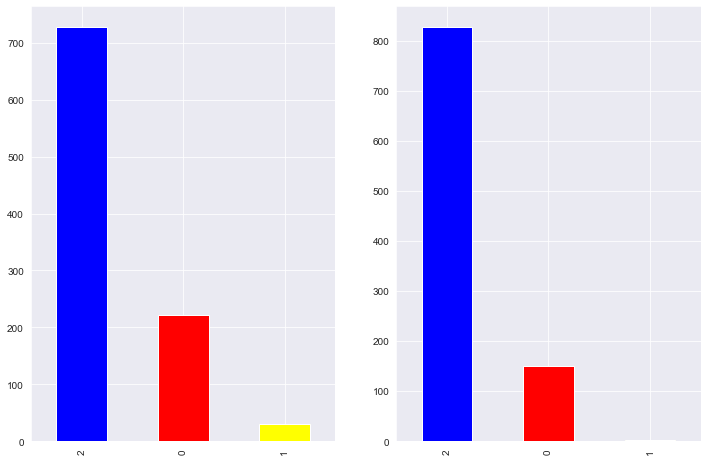

In [350]:
plt.subplot(1,2,1)
y_test_2.value_counts().sort_values(ascending=False).plot.bar(figsize=(12,8), color=['blue','red','yellow'])
plt.subplot(1,2,2)
y_test_fpred.value_counts().sort_values(ascending=False).plot.bar(figsize=(12,8), color=['blue','red','yellow'])